# Price of Houses

<a target="_blank" href="https://colab.research.google.com/github/LuisAngelMendozaVelasco/luisangelmendozavelasco.github.io/blob/master/_portfolio/IBM_AI_Engineering/portfolio-5.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>

**Objective**: Build a Decision Tree regressor that can predict the median price of houses for various areas of Boston.

A [Decision Tree](https://en.wikipedia.org/wiki/Decision_tree_learning#Decision_tree_types) regressor is a type of supervised learning algorithm used for regression tasks, where the goal is to predict a continuous value or a numerical output. It is a variant of the Decision Tree algorithm, which is commonly used for classification tasks.

## Import libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
sns.set_style("whitegrid")

## Load the dataset

In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/real_estate_data.csv"
df = pd.read_csv(file_url)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


## Understand the dataset

The dataset contains information about various areas of Boston to predict the median price of houses for that area so it can be used for investing in Boston real estate.

The dataset contains information on areas/towns not individual houses, the features are:

- CRIM: Crime per capita
- ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxides concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to ﬁve Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property-tax rate per $10,000
- PTRAIO: Pupil-teacher ratio by town
- LSTAT: Percent lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    486 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


## Visualize the dataset

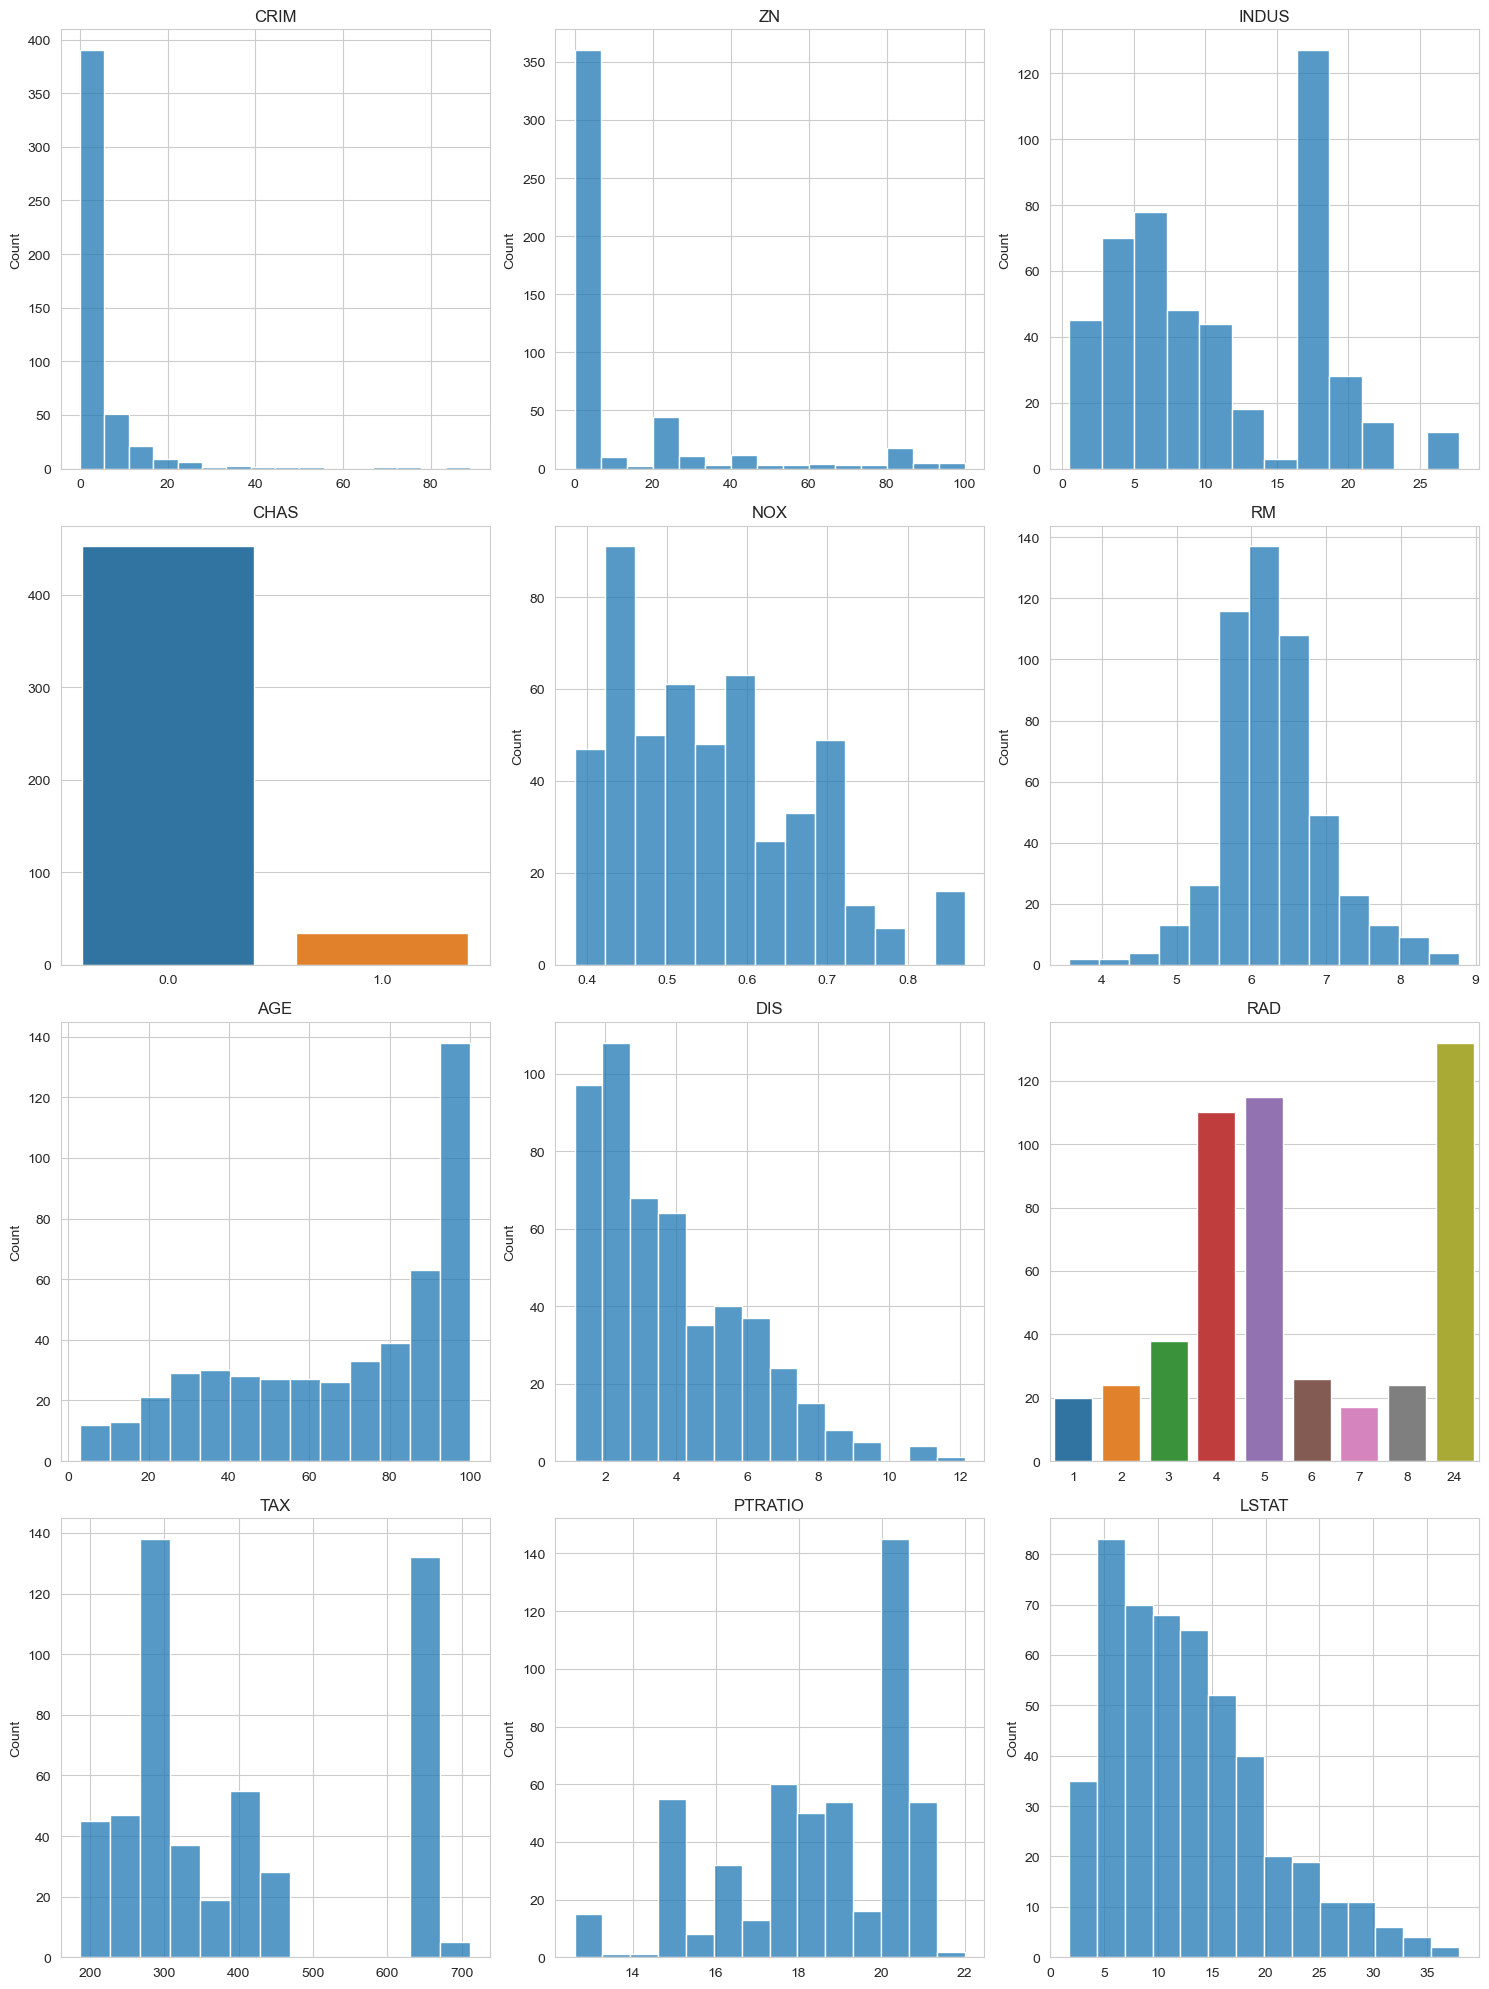

In [4]:
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

for ax, feature in zip(axs.flatten(), df.columns):
    if len(df[feature].unique()) <= 10:
        labels, sizes = np.unique(df[feature], return_counts=True)
        sns.barplot(x=labels, y=sizes, hue=labels, ax=ax, palette="tab10", legend=False)
        ax.set_xlabel("")
        ax.set_title(feature)
    else:
        sns.histplot(data=df, x=feature, ax=ax, bins="doane")
        ax.set_xlabel("")
        ax.set_title(feature)

plt.tight_layout()
plt.show()

## Preprocess the dataset

Drop rows with missing values:

In [5]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  LSTAT    394 non-null    float64
 12  MEDV     394 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 43.1 KB


In [6]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

## Visualize the target feature

Plot the relationship between the target feature and the features with the highest [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). The latter quantifies the strength and direction of a linear relationship between two continuous variables.

In [7]:
correlations = []

for feature in X.columns:
    correlation, _ = stats.pearsonr(X[feature], y)
    correlations.append(correlation)

pd.DataFrame(data={"Features": X.columns, "MEDV": correlations}).set_index("Features").transpose()

Features,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
MEDV,-0.39723,0.406822,-0.510829,0.173701,-0.459054,0.723951,-0.40747,0.279547,-0.416638,-0.508864,-0.543809,-0.74345


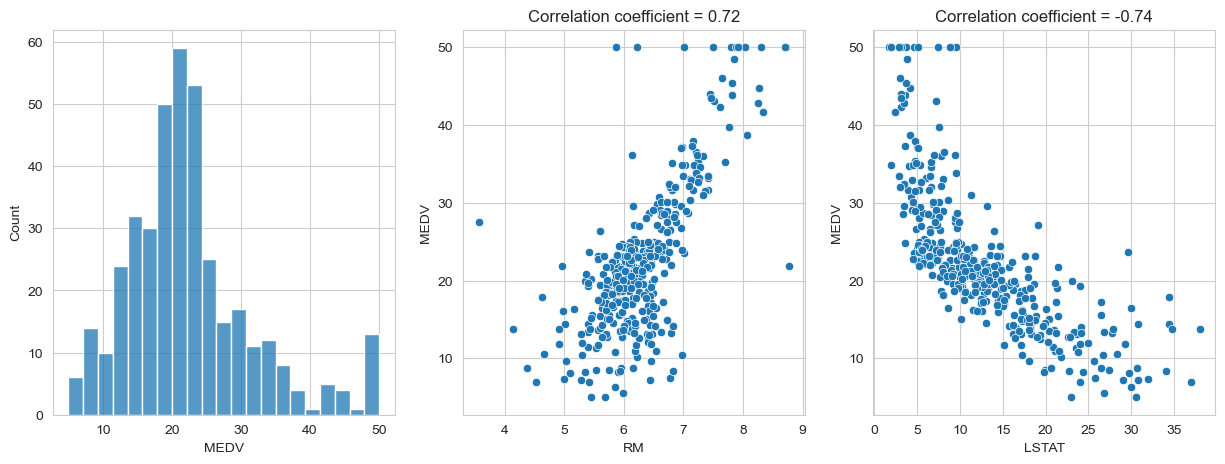

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, feature in zip(axs.flatten(), ["MEDV", "RM", "LSTAT"]):
    if feature != "MEDV":
        sns.scatterplot(x=feature, y="MEDV", data=df, ax=ax)
        correlation, _ = stats.pearsonr(X[feature], y)
        ax.set_title(f"Correlation coefficient = {correlation:.2f}")
    else:
        sns.histplot(x="MEDV", data=df, ax=ax)

plt.show()

## Split the dataset into train and test subsets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (295, 12)
X_test shape: (99, 12)


## Train a Decision Tree regressor

In [10]:
regressor = DecisionTreeRegressor(criterion='squared_error')
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

## Evaluate the model

In [11]:
y_pred = regressor.predict(X_test)

print(f"MSE = {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² = {r2_score(y_test, y_pred):.2f}")

MSE = 12.22
R² = 0.83
